In [1]:
import numpy as np
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
wine = load_wine(as_frame=True)
wine = pd.DataFrame(wine.frame)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [4]:
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [5]:
corr = wine.corr()
corr['target'].sort_values(ascending=False)

,target
target,1.000000
alcalinity_of_ash,0.517859
nonflavanoid_phenols,0.489109
malic_acid,0.437776
color_intensity,0.265668
ash,-0.049643
magnesium,-0.209179
alcohol,-0.328222
proanthocyanins,-0.499130
hue,-0.617369


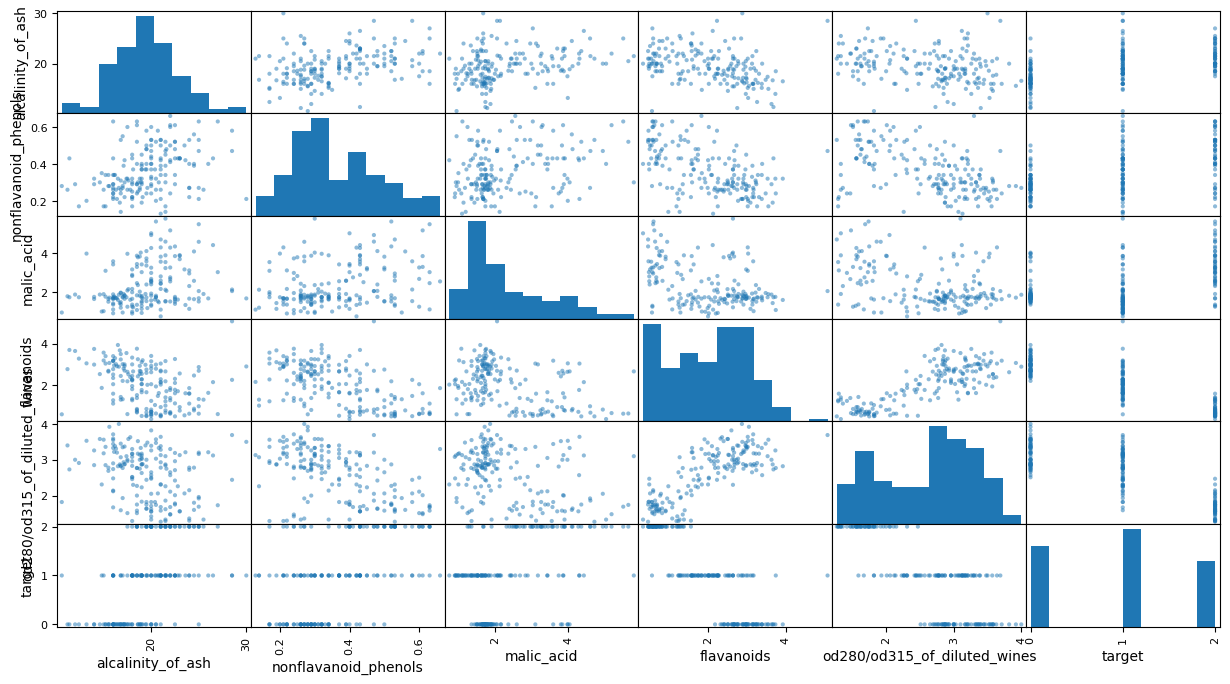

In [6]:
from pandas.plotting import scatter_matrix
labels = ['alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid', 'flavanoids','od280/od315_of_diluted_wines', 'target']
scatter_matrix(wine[labels], figsize=(15,8))
plt.show()

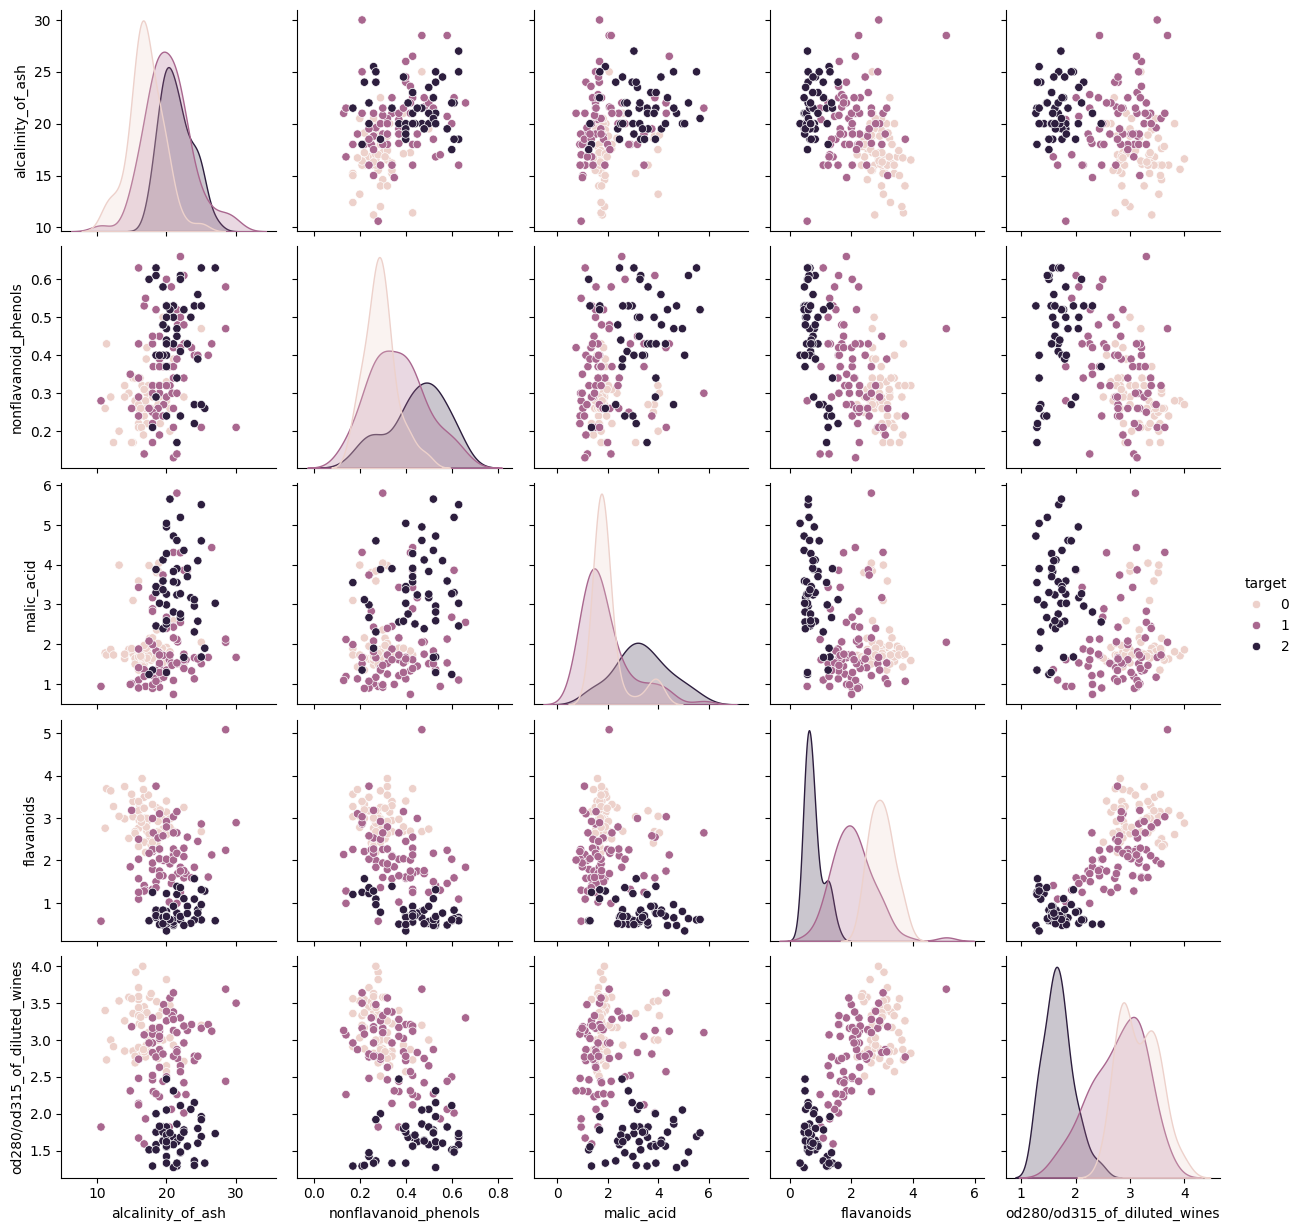

In [7]:
sns.pairplot(wine[labels], hue='target', diag_kind='kde')
plt.show()

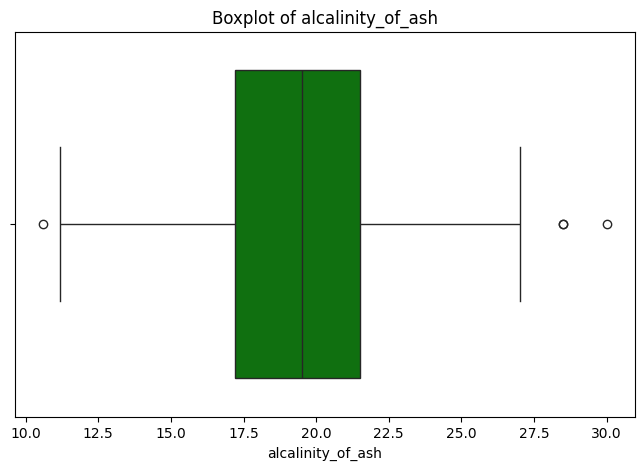

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=wine['alcalinity_of_ash'], color='green')
plt.title('Boxplot of alcalinity_of_ash')
plt.xlabel('alcalinity_of_ash')
plt.show()

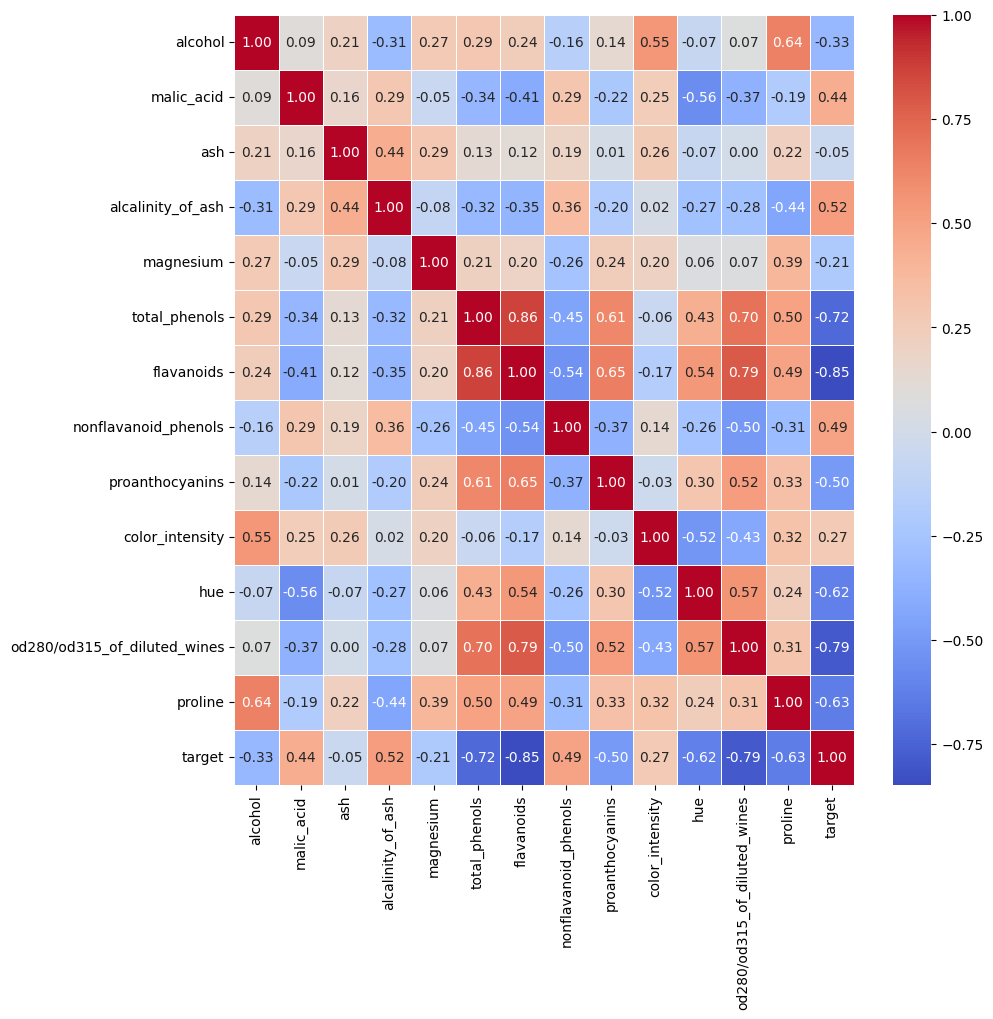

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

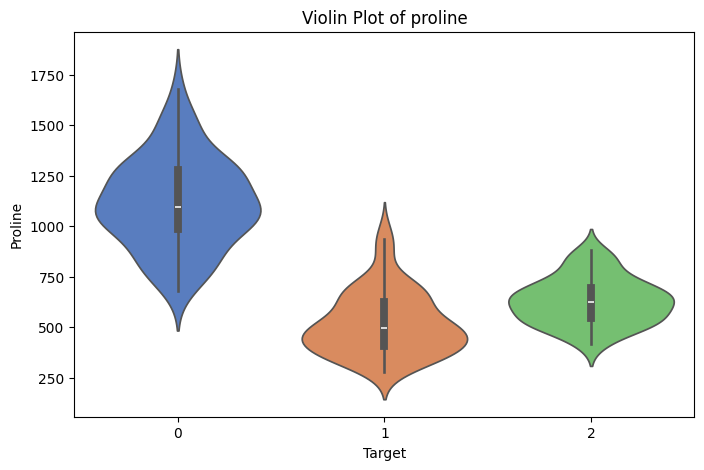

In [10]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=wine['target'], y=wine['proline'], palette='muted', legend=False, hue=wine['target'])
plt.title('Violin Plot of proline')
plt.xlabel('Target')
plt.ylabel('Proline')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
wine_target  = wine['target'].copy()
wine_features = wine.drop('target', axis=1).copy()
X_train, X_test, y_train, y_test = train_test_split(wine_features,wine_target, test_size=0.2,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline

preprocessing = Pipeline([('scaler', StandardScaler())])
reduction = Pipeline([('scaler', StandardScaler()),
          ('pca', PCA(n_components=8)),])

In [13]:
X_pca = X_train.copy()
X_pca = reduction.fit_transform(X_pca)
pca_result = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
print("Explained Variance for PCs:\n ", reduction['pca'].explained_variance_ratio_)
pca_result.head()

Explained Variance for PCs:
  [0.35900066 0.18691934 0.11606557 0.07371716 0.0665386  0.04854582
 0.04195042 0.02683922]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.166027,3.615327,1.151285,-1.167179,0.221634,-3.062380,-0.553745,0.918085
1,-3.862612,0.482177,1.727584,-0.467086,-0.226540,1.016510,1.257686,-0.113136
2,2.283538,-1.275033,-0.131677,-1.107830,0.215798,-1.004315,-0.979052,-0.678263
3,-1.678507,2.496962,0.556619,-1.131270,-0.003420,-2.754779,-0.666927,0.150849
4,1.572842,-0.688203,-1.417945,0.425082,-0.674013,0.320546,-0.078362,-0.127387


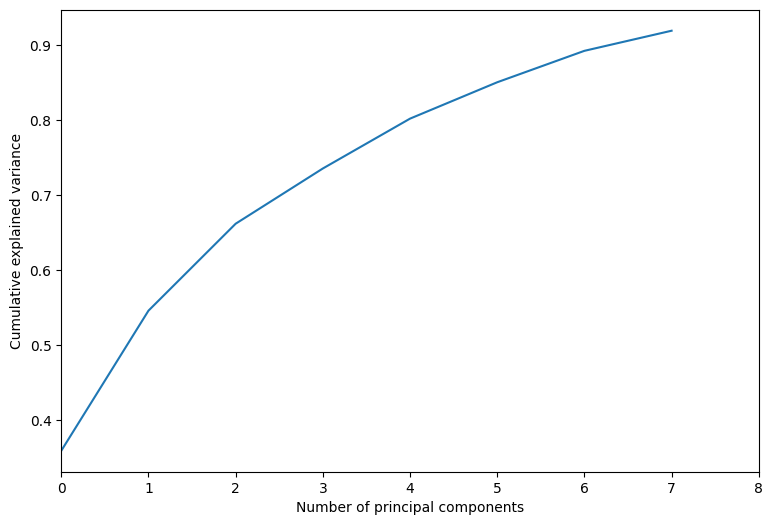

Explained variance for PCs:  [0.35900066 0.18691934 0.11606557 0.07371716 0.0665386  0.04854582
 0.04195042 0.02683922]


In [14]:
pca_std = reduction.named_steps['pca']

fig, ax = plt.subplots(figsize=(9,6))
sns.lineplot(np.cumsum(pca_std.explained_variance_ratio_))
plt.xlim(0, 8)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

print("Explained variance for PCs: ", pca_std.explained_variance_ratio_)

In [26]:
from sklearn.svm import SVC

svc = make_pipeline(preprocessing,SVC(kernel='rbf', decision_function_shape='ovr'))

In [27]:
model = svc.fit(X_train,y_train)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, recall_score
pred = model.predict(X_test)
print(classification_report(y_test,pred))
print("Accuracy: ",accuracy_score(y_test,pred))
print("Recall: ",recall_score(y_test,pred, average = 'weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy:  1.0
Recall:  1.0


In [18]:
model.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [19]:
model.decision_function(X_test[:3])

array([[ 2.24707959,  0.84093398, -0.22040775],
       [ 2.23353891,  0.84172575, -0.19650154],
       [-0.22306351,  1.03171034,  2.21909028]])

In [20]:
y_test[:3]

,target
19,0
45,0
140,2


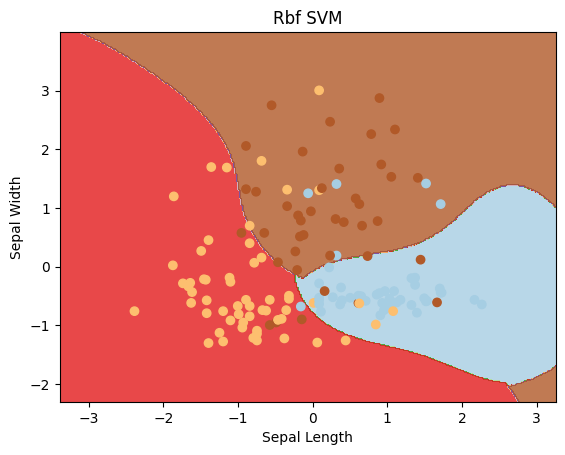

In [49]:
#visualization
X = X_train.iloc[:,:2]
y = y_train
scale = StandardScaler()
X = scale.fit_transform(X)
# Create a mesh to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

clf = SVC(kernel='rbf', decision_function_shape='ovr')
clf = clf.fit(X,y_train)
# Plot decision boundary of Linear SVM
Z_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title('Rbf SVM')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()